<a href="https://colab.research.google.com/github/Captmoonshot/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

In [4]:
plt.style.available

['seaborn-muted',
 'seaborn-ticks',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-talk',
 'dark_background',
 'seaborn-bright',
 'bmh',
 'seaborn-white',
 'grayscale',
 'fast',
 'seaborn-pastel',
 'classic',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'seaborn',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-dark-palette',
 'ggplot']

In [0]:
plt.style.use('fivethirtyeight')

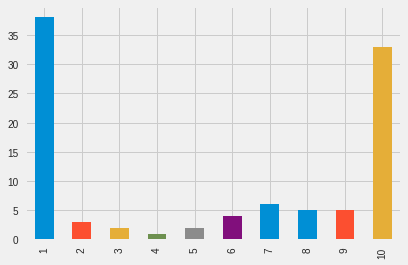

In [6]:
fake.plot.bar()

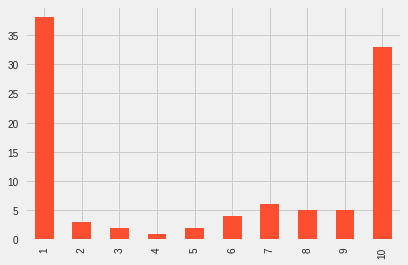

In [7]:
fake.plot.bar(color='C1');

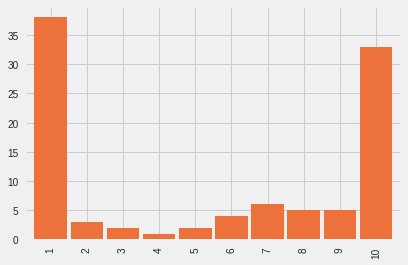

In [8]:
fake.plot.bar(color='#EC713B', width=0.9);

In [0]:
fake2 = pd.Series([
    1, 1, 1, 1, 1, 1, 1, 1 ,1,
    2, 2, 2,
    3, 3, 3,
    4, 4, 
    5, 5, 5, 
    6, 6, 6, 6, 
    7, 7, 7, 7, 7, 
    8, 8, 8, 8,
    9, 9, 9, 9,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
])

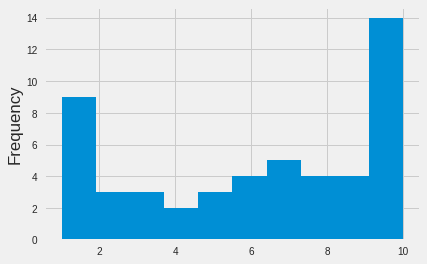

In [10]:
fake2.plot.hist();

In [11]:
fake2.value_counts()

10    14
1      9
7      5
9      4
8      4
6      4
5      3
3      3
2      3
4      2
dtype: int64

In [12]:
# To get it in the same representatino as fake1

fake2.value_counts().sort_index()

1      9
2      3
3      3
4      2
5      3
6      4
7      5
8      4
9      4
10    14
dtype: int64

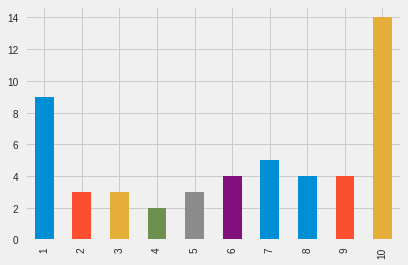

In [13]:
fake2.value_counts().sort_index().plot.bar()

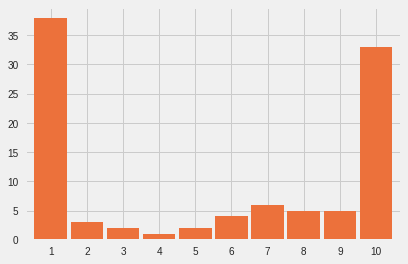

In [14]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))

plt.style.use('fivethirtyeight')

ax = fake.plot.bar(color='#EC713B', width=0.9)

ax.tick_params(labelrotation=0)

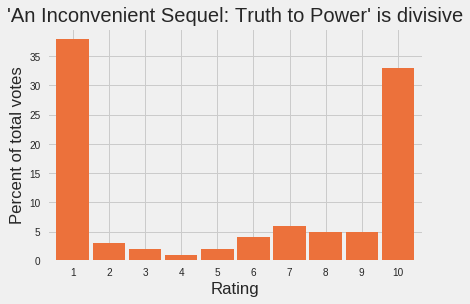

In [15]:
# Adding a title

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))

plt.style.use('fivethirtyeight')

ax = fake.plot.bar(color='#EC713B', width=0.9)

ax.set(title="'An Inconvenient Sequel: Truth to Power' is divisive",
       xlabel='Rating',
       ylabel='Percent of total votes')

ax.tick_params(labelrotation=0)

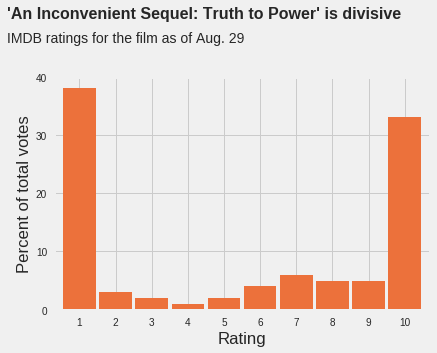

In [16]:
# Trying to add subtitles

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))

plt.style.use('fivethirtyeight')

ax = fake.plot.bar(color='#EC713B', width=0.9)

# Changing y-axis scale
ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0, 50, 10))

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s="IMDB ratings for the film as of Aug. 29")

ax.tick_params(labelrotation=0)

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [18]:
df.shape

(80053, 27)

In [0]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [21]:
# Another way to check all columns

df.sample(1).T

,31360
timestamp,2017-08-12 04:00:03.094305
respondents,2
category,Females under 18
link,http://www.imdb.com/title/tt6322922/ratings-fe...
average,1
mean,1
median,1
1_votes,2
2_votes,0
3_votes,0


In [22]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-20 18:20:02.191280
freq                               1
Name: timestamp, dtype: object

In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [24]:
# To get first and last dates

df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [26]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [27]:
# To see the last date you can simply pass in a string of the index

df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80053 entries, 2017-07-17 12:28:32.785639 to 2017-08-29 23:10:06.218251
Data columns (total 26 columns):
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null fl

In [29]:
df.category.value_counts()

IMDb users            4216
IMDb staff            4216
US users              4216
Males Aged 18-29      4216
Females Aged 45+      4216
Males Aged 30-44      4216
Females Aged 18-29    4216
Females Aged 30-44    4216
Females               4216
Aged 18-29            4216
Males under 18        4216
Males Aged 45+        4216
Aged 30-44            4216
Non-US users          4216
Top 1000 voters       4216
Aged 45+              4216
Males                 4216
Aged under 18         4216
Females under 18      4165
Name: category, dtype: int64

In [30]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-male_age_1       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www

In [31]:
df[df.category=='IMDb users'].head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7


In [0]:
lastday = df['2017-08-29']

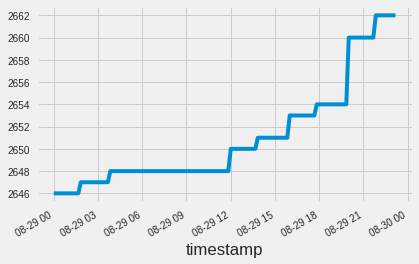

In [33]:
# To check if the number of respondents is cumulative or not

lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
# Respondents is monotoncally increasing therefore cumulative so need to add by timestamp
# So we can just look at the last value to get the number of respondents and other values

In [35]:
df.tail(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = df.tail(1)

In [0]:
columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
          '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

data = final[columns].T

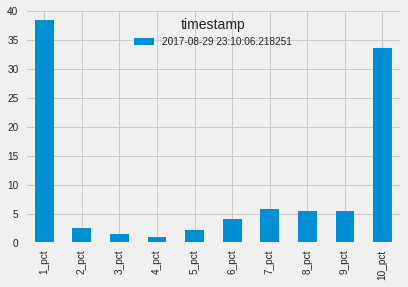

In [38]:
data.plot.bar()

In [0]:
data.index = range(1, 11)

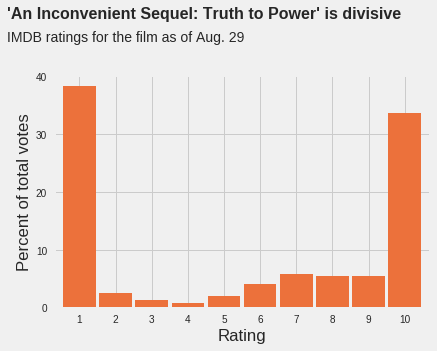

In [40]:

# Trying to add subtitles

# fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                # index=range(1,11))

plt.style.use('fivethirtyeight')

# Use the data DataFrame for plot
ax = data.plot.bar(color='#EC713B', width=0.9, legend=False) # Remove legend

# Changing y-axis scale
ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
      yticks=range(0, 50, 10))

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s="IMDB ratings for the film as of Aug. 29")

ax.tick_params(labelrotation=0)




## Custom Plot

In [58]:
males = df[df['category'].isin(['Males'])]
males.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:34:17.770310,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 13:00:02.497484,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 14:00:02.990387,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5
2017-07-17 15:00:02.218990,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5


In [59]:
males['respondents_pct'] = (males['respondents']/males['respondents'][-1]) * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
males['respondents_pct'].head()

timestamp
2017-07-17 12:28:32.785639    23.744832
2017-07-17 12:34:17.770310    23.744832
2017-07-17 13:00:02.497484    23.744832
2017-07-17 14:00:02.990387    23.803898
2017-07-17 15:00:02.218990    23.803898
Name: respondents_pct, dtype: float64

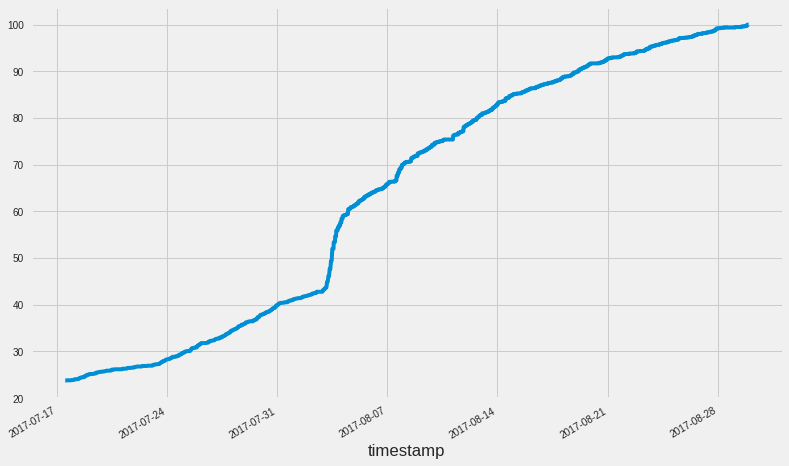

In [65]:
males['respondents_pct'].plot(figsize=(12, 8))

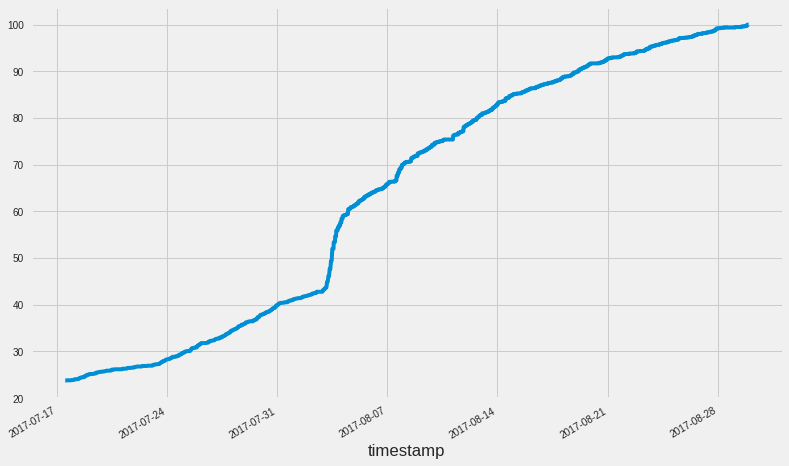

In [66]:
plot = males['respondents_pct'].plot(figsize=(12, 8))
fig = plot.get_figure()


In [0]:
plot.xaxis.label.set_visible(False)

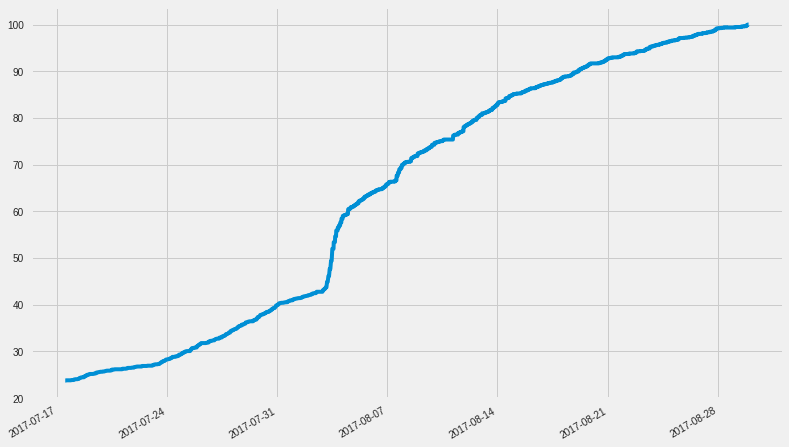

In [68]:
fig

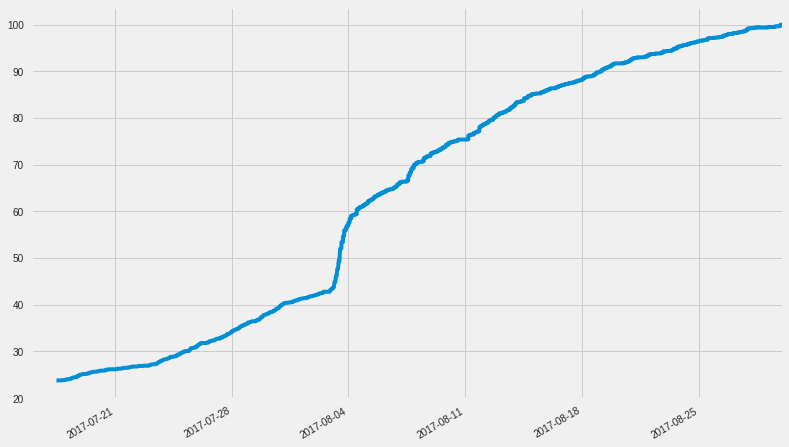

In [69]:
plot.set_xlim(left='2017-07-16', right='2017-08-30')
fig

## Final Custom 538 Plot


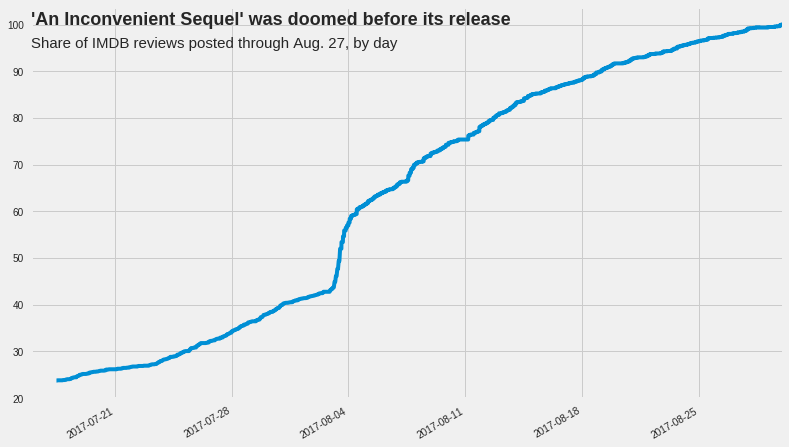

In [70]:
plot.text(x='2017-07-16', y= 100, s="'An Inconvenient Sequel' was doomed before its release",
          fontsize=18, fontweight='bold')
plot.text(x='2017-07-16', y= 95, s="Share of IMDB reviews posted through Aug. 27, by day",
         fontsize=15)

fig